Perform Hierarchical Drift-Diffusion Modeling of the StateSwitch Dynamic Responses using the HDDM toolbox

In [1]:
import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")

import pickle

def savePatch(self, fname):
    with open(fname, 'wb') as f:
        pickle.dump(self, f)

import os
dirname = os.path.realpath('../..')

dirname


HDDM version: 0.8.0
Numpy version: 1.21.5
Important: Warnings disabled for improved clarity


/mnt/beegfs/home/kosciessa/.virtualenvs/hddm_env/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


'/mnt/beegfs/home/LNDG/stateswitch/stsw_beh_task/hddm'

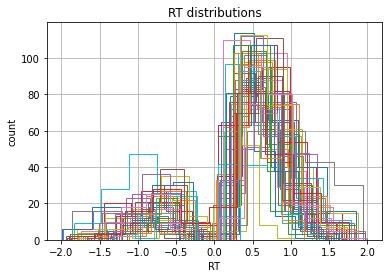

In [2]:
# get data from numpy structured array

group = 'YA'
modality = 'EEG'
params = 'v'

dataPath = os.path.join(dirname, 'data')
csvData = os.path.join(dataPath,'StateSwitchDynamicTrialData_'+modality+'_'+group+'.dat')
savePath = os.path.join(dataPath, 'hddm', group+'_'+modality+'_'+params)
if not os.path.exists(savePath):
    os.makedirs(savePath)

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=10, histtype='step', ax=ax)
    

In [3]:
model = hddm.HDDM(data, depends_on={'v': ['dim']}, p_outlier=.05)
model.find_starting_values()
model.sample(10, burn=0, dbname='traces.db', db='pickle')
fileName = 'test'
print('Model will be saved at: '+ os.path.join(savePath,fileName))
model.savePatch = savePatch(model, os.path.join(savePath,fileName))

 [------------------110%-------------------] 11 of 10 complete in 11.9 secModel will be saved at: /mnt/beegfs/home/LNDG/stateswitch/stsw_beh_task/hddm/data/hddm/YA_EEG_v/test


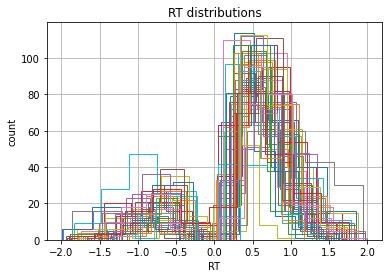

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=10, histtype='step', ax=ax)